#Predicting sentiment from product reviews

#Fire up GraphLab Create

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt

#Read some product review data

Loading reviews for a set of baby products. 

In [3]:
products = pd.read_csv("/Users/yananli/Desktop/UWashington/1.Machine Learning Foundations/Week 3/HW/amazon_baby.csv")

#Let's explore this data together

Data includes the product name, the review text and the rating of the review. 

In [4]:
products.head()

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5


#Build the word count vector for each review

In [25]:
from collections import Counter

products['word_count'] = products['review'].apply(lambda x: Counter(str(x).split()))

#products['word_count'] = graphlab.text_analytics.count_words(products['review'])

In [26]:
products.head()

,name,review,rating,word_count
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3,"{u'and': 5, u'stink': 1, u'Blue-12': 1, u'orde..."
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,"{u'and': 3, u'love': 1, u'it': 2, u'highly': 1..."
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,"{u'and': 2, u'quilt': 1, u'it': 1, u'comfortab..."
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,"{u'and': 3, u'ingenious': 1, u'What': 1, u'lov..."
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,"{u'and': 2, u'it.This': 1, u'all': 1, u'help':..."


In [28]:
selected_words = ['awesome', 'great', 'fantastic', 'amazing', 'love', 'horrible', 'bad', 'terrible', 'awful', 'wow', 'hate']

In [39]:
for i in selected_words:
    products[i] = products['word_count'].apply(lambda x: x[i] if i in x.keys() else 0)

#Examining the reviews for most-sold product:  'Vulli Sophie the Giraffe Teether'

In [173]:
for i in selected_words:
    print(i, np.sum(products[i], axis=0))

('awesome', 1606)
('great', 34509)
('fantastic', 754)
('amazing', 1114)
('love', 32129)
('horrible', 567)
('bad', 3093)
('terrible', 587)
('awful', 303)
('wow', 48)
('hate', 945)


In [41]:
products.head()

,name,review,rating,word_count,awesome,great,fantastic,amazing,love,horrible,bad,terrible,awful,wow,hate
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3,"{u'and': 5, u'stink': 1, u'Blue-12': 1, u'orde...",0,0,0,0,0,0,0,0,0,0,0
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,"{u'and': 3, u'love': 1, u'it': 2, u'highly': 1...",0,0,0,0,1,0,0,0,0,0,0
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,"{u'and': 2, u'quilt': 1, u'it': 1, u'comfortab...",0,0,0,0,0,0,0,0,0,0,0
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,"{u'and': 3, u'ingenious': 1, u'What': 1, u'lov...",0,0,0,0,2,0,0,0,0,0,0
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,"{u'and': 2, u'it.This': 1, u'all': 1, u'help':...",0,1,0,0,0,0,0,0,0,0,0


In [170]:
products.iloc[2].word_count

Counter({'I': 3,
         'She': 1,
         'This': 1,
         'What': 1,
         'a': 2,
         'about': 1,
         'and': 3,
         'anything': 1,
         'approach': 2,
         'artwork,': 1,
         'back,': 1,
         'binky.': 2,
         'chart': 1,
         'clever': 1,
         'daughter': 1,
         'else': 1,
         'fairy.': 1,
         'found': 1,
         'getting': 1,
         'has': 1,
         'have': 1,
         'her': 1,
         'herself,': 1,
         'how': 1,
         'in': 2,
         'ingenious': 1,
         'is': 4,
         'it': 1,
         'like': 1,
         'little': 1,
         'losing': 1,
         'love': 2,
         'loves': 1,
         'most': 1,
         'much': 1,
         'my': 1,
         'not': 1,
         'of': 3,
         'ownership': 1,
         'positive,': 1,
         'product': 2,
         'proud': 1,
         'purchase.': 1,
         'rid': 1,
         'so': 1,
         'the': 7,
         'this': 2,
         'this,': 1,
   

In [45]:
#ignore all 3* reviews
products = products[products['rating'] != 3]

#positive sentiment = 4* or 5* reviews
products['sentiment'] = (products['rating'] >=4).apply(int)

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

feature_train, feature_test, sentiment_train, sentiment_test = train_test_split(products[selected_words], products.sentiment, test_size=0.2, random_state=0)

selected_words_model = LogisticRegression(random_state=0).fit(feature_train, sentiment_train)

products_pred = selected_words_model.predict(feature_test)
print('Coefficients: \n', selected_words_model.coef_)
print(selected_words_model.predict(feature_test))
print(selected_words_model.predict_proba(feature_test))

coef = pd.DataFrame({"coefficient":selected_words_model.coef_[0],"word":np.array(selected_words)})
coef.sort_values(by="coefficient")
print(coef)

('Coefficients: \n', array([[ 0.98954636,  0.74514138,  0.64888452,  0.91712453,  1.3542832 ,
        -1.91692443, -0.91081446, -1.87571192, -1.5426131 , -0.32399358,
        -1.41290439]]))
[1 1 1 ... 1 1 1]
[[0.19006113 0.80993887]
 [0.19006113 0.80993887]
 [0.19006113 0.80993887]
 ...
 [0.19006113 0.80993887]
 [0.19006113 0.80993887]
 [0.19006113 0.80993887]]
    coefficient       word
0      0.989546    awesome
1      0.745141      great
2      0.648885  fantastic
3      0.917125    amazing
4      1.354283       love
5     -1.916924   horrible
6     -0.910814        bad
7     -1.875712   terrible
8     -1.542613      awful
9     -0.323994        wow
10    -1.412904       hate


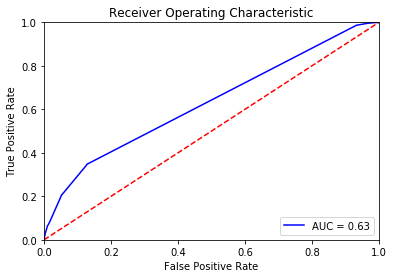

Accuracy Score:0.8409343048184462


In [80]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

fpr, tpr, threshold = metrics.roc_curve(sentiment_test, selected_words_model.predict_proba(feature_test)[:,1], pos_label=None, sample_weight=None, drop_intermediate=True)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print("Accuracy Score:" + str(accuracy_score(sentiment_test, selected_words_model.predict(feature_test))))

feature_train, feature_test, sentiment_train, sentiment_test = train_test_split(products['word_count'], products.sentiment, test_size=0.2, random_state=0)

word_count_model = LogisticRegression(random_state=0).fit(feature_train, sentiment_train)

products_pred = word_count_model.predict(feature_test)
print('Coefficients: \n', word_count_model.coef_)
print(word_count_model.predict(feature_test))
print(word_count_model.predict_proba(feature_test))


fpr, tpr, threshold = metrics.roc_curve(sentiment_test, word_count_model.predict_proba(feature_test)[:,1], pos_label=None, sample_weight=None, drop_intermediate=True)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print("Accuracy Score:" + str(accuracy_score(sentiment_test, word_count_model.predict(feature_test))))

In [101]:
Counter(sentiment_train)
print("The accuracy majority class classifier on this task is: " + str(1))
print("Accuracy Score of the baseline model:" + str(accuracy_score(sentiment_test, np.ones(len(sentiment_test)))))

The accuracy majority class classifier on this task is: 1
Accuracy Score of the baseline model:0.8392252106383616


In [125]:
diaper_champ_reviews = products[products.name == "Baby Trend Diaper Champ"]
diaper_champ_reviews

,name,review,rating,word_count,awesome,great,fantastic,amazing,love,horrible,bad,terrible,awful,wow,hate,sentiment
312,Baby Trend Diaper Champ,Ok - newsflash. Diapers are just smelly. We\...,4,"{u'just': 2, u'less': 1, u'when': 2, u'smell-c...",0,0,0,0,0,0,0,0,0,0,0,1
314,Baby Trend Diaper Champ,"My husband and I selected the Diaper ""Champ"" m...",1,"{u'things': 1, u'bags,': 1, u'less': 1, u'when...",0,0,0,0,0,0,0,0,0,0,0,0
315,Baby Trend Diaper Champ,Excellent diaper disposal unit. I used it in ...,5,"{u'control': 1, u'am': 1, u'it': 1, u'nose!!!'...",0,0,0,0,0,0,0,0,0,0,0,1
316,Baby Trend Diaper Champ,We love our diaper champ. It is very easy to ...,5,"{u'and': 3, u'over.': 1, u'all': 1, u'love': 1...",0,0,0,0,1,0,0,0,0,0,0,1
317,Baby Trend Diaper Champ,Two girlfriends and two family members put me ...,5,"{u'Also,': 1, u'just': 1, u'when': 1, u'both':...",0,0,0,0,0,1,0,0,0,0,0,1
318,Baby Trend Diaper Champ,I waited to review this until I saw how it per...,4,"{u'all': 1, u'mom.': 1, u'busy': 1, u'stinky':...",0,0,0,0,0,0,1,0,0,0,0,1
319,Baby Trend Diaper Champ,I have had a diaper genie for almost 4 years s...,1,"{u'all': 1, u'bags.': 1, u'they': 1, u'just': ...",0,0,0,0,0,0,0,0,0,0,0,0
320,Baby Trend Diaper Champ,I originally put this item on my baby registry...,5,"{u'bags.': 1, u'CLEAN': 1, u'just': 1, u'less'...",0,0,0,0,0,0,0,0,0,0,0,1
321,Baby Trend Diaper Champ,I am so glad I got the Diaper Champ instead of...,5,"{u'and': 2, u'all': 1, u'just': 1, u'is': 2, u...",0,0,0,0,0,0,0,0,0,0,0,1
322,Baby Trend Diaper Champ,We had 2 diaper Genie\'s both given to us as a...,4,"{u'hand.': 1, u'(required': 1, u'before': 1, u...",0,0,0,0,2,0,0,0,0,0,0,1


In [141]:
#selected_words_model.predict(diaper_champ_reviews[selected_words])
pd.options.mode.chained_assignment = None

diaper_champ_reviews['predicted_sentiment'] = selected_words_model.predict_proba(diaper_champ_reviews[selected_words])[:,1]

In [149]:
diaper_champ_reviews = diaper_champ_reviews.sort_values(by="predicted_sentiment", ascending = False)

In [150]:
diaper_champ_reviews

,name,review,rating,word_count,awesome,great,fantastic,amazing,love,horrible,bad,terrible,awful,wow,hate,sentiment,predicted_sentiment
446,Baby Trend Diaper Champ,I received my Diaper Champ at my baby shower f...,5,"{u'bags.': 1, u'son.': 1, u'of,': 1, u'ease': ...",0,0,0,0,3,0,0,0,0,0,0,1,0.995980
426,Baby Trend Diaper Champ,I love this diaper pale and wouldn\'t dream of...,5,"{u'and': 3, u'love': 1, u'use.': 1, u'else.': ...",0,2,0,0,1,0,0,0,0,0,0,1,0.986536
573,Baby Trend Diaper Champ,I love this diaper pail! It\'s so easy to use...,5,"{u'and': 3, u'love': 2, u'being': 1, u'money':...",0,0,0,0,2,0,0,0,0,0,0,1,0.984605
497,Baby Trend Diaper Champ,I have a two-year-old son and I love the Diape...,5,"{u'and': 6, u'it.': 2, u'contains': 1, u'love'...",0,0,0,0,2,0,0,0,0,0,0,1,0.984605
322,Baby Trend Diaper Champ,We had 2 diaper Genie\'s both given to us as a...,4,"{u'hand.': 1, u'(required': 1, u'before': 1, u...",0,0,0,0,2,0,0,0,0,0,0,1,0.984605
559,Baby Trend Diaper Champ,I\'ve worked with kids more than half my life....,5,"{u'and': 4, u'genies': 1, u'all': 1, u'because...",0,0,0,0,2,0,0,0,0,0,0,1,0.984605
456,Baby Trend Diaper Champ,I love this diaper pail. It keeps the diapers ...,4,"{u'and': 1, u'love': 2, u'extra': 1, u'is': 1,...",0,0,0,0,2,0,0,0,0,0,0,1,0.984605
376,Baby Trend Diaper Champ,"This is absolutely, by far, the best diaper pa...",5,"{u'bags,': 1, u'money': 1, u'still': 2, u'job....",0,0,0,0,2,0,0,0,0,0,0,1,0.984605
459,Baby Trend Diaper Champ,"Love it, love it, love it! This lives up to t...",5,"{u'all': 1, u'already': 1, u'love': 2, u'purch...",0,0,0,0,2,0,0,0,0,0,0,1,0.984605
547,Baby Trend Diaper Champ,I received the Diaper Champ at my baby shower ...,5,"{u'just': 1, u'one.': 1, u'down,': 1, u'go': 1...",0,1,0,0,1,0,0,0,0,0,0,1,0.972051
